In [125]:
import requests
from PIL import Image

In [126]:
subscription_key = '2a27e11cacae4ca0aa27fe68c84feb1e'

In [127]:
assert subscription_key

In [128]:
face_api_url = 'https://face-recognition-app.cognitiveservices.azure.com/face/v1.0/detect'

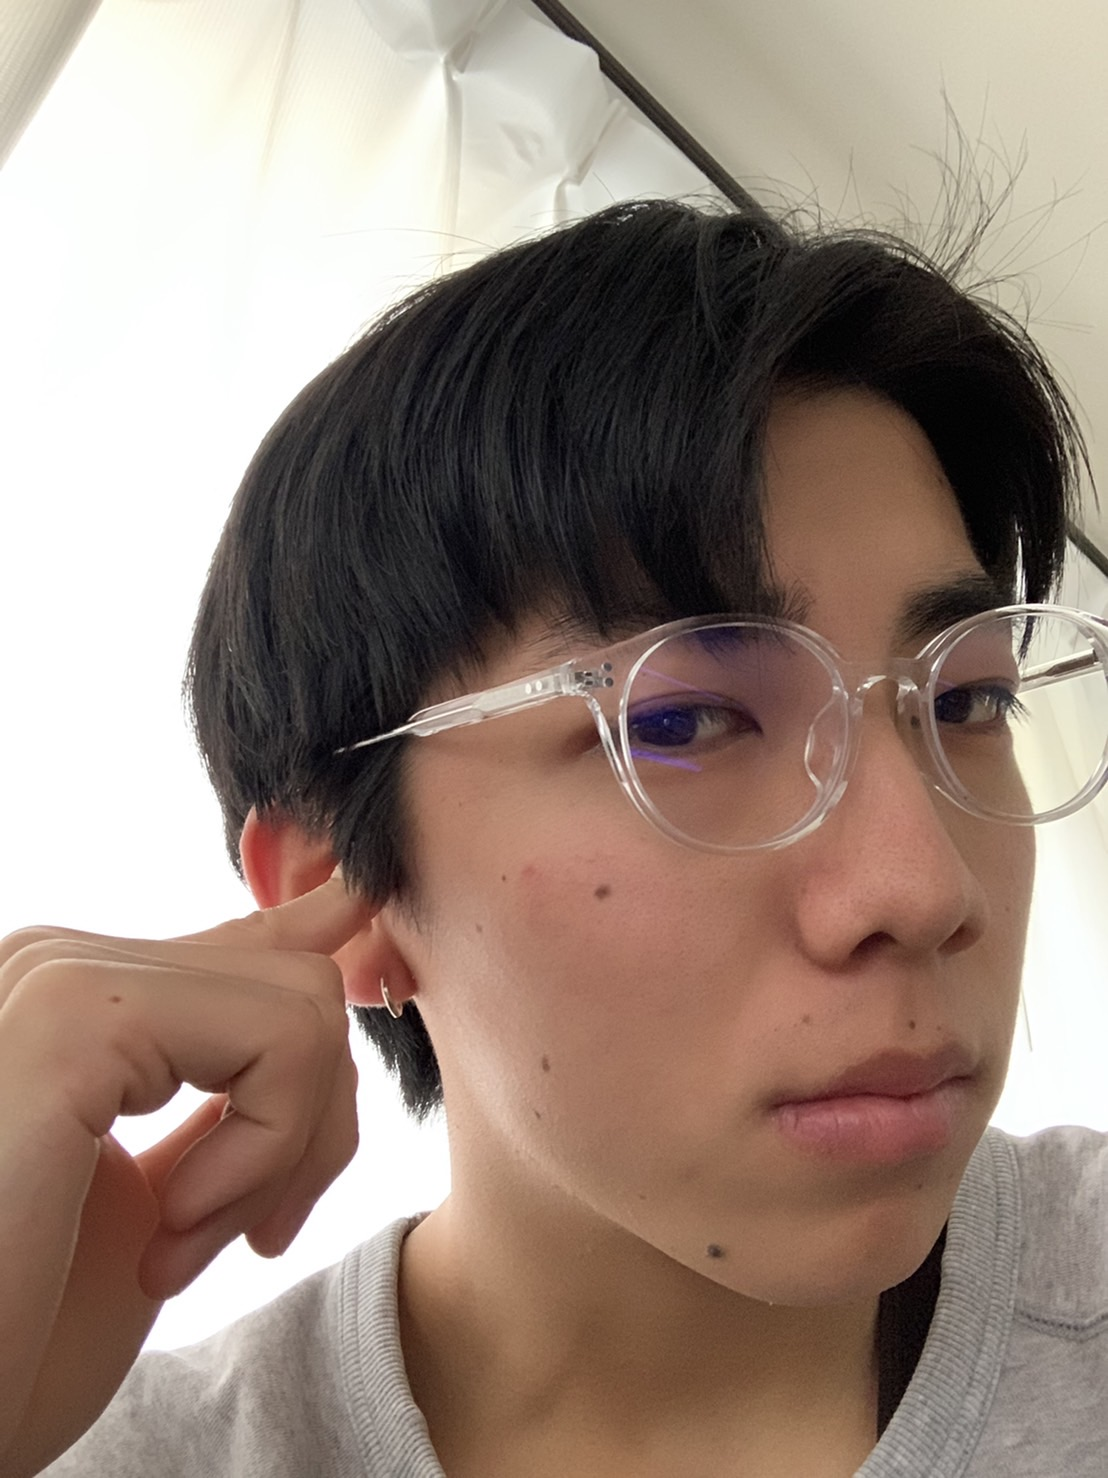

In [129]:
img = Image.open('カジュアル写真画像.jpg')
img

In [130]:
with open('カジュアル写真画像.jpg', 'rb') as f:
    binary_img = f.read()

In [131]:
# binary_img

In [132]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}
           
params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise', 
}

response = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [133]:
response

<Response [200]>

In [134]:
result = response.json()
result

[{'faceId': '9b47c18e-aaef-4656-b52d-d6ec4715ec25',
  'faceRectangle': {'top': 532, 'left': 498, 'width': 609, 'height': 724},
  'faceAttributes': {'smile': 0.0,
   'headPose': {'pitch': -7.2, 'roll': -6.5, 'yaw': 29.6},
   'gender': 'male',
   'age': 19.0,
   'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1},
   'glasses': 'ReadingGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.972,
    'sadness': 0.027,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.74},
   'noise': {'noiseLevel': 'low', 'value': 0.05},
   'makeup': {'eyeMakeup': False, 'lipMakeup': True},
   'accessories': [{'type': 'glasses', 'confidence': 0.98}],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.17,
    'invisible': False,
    'hairColor': [{'color': 'black', '

In [135]:
rect = result[0]['faceRectangle']

In [136]:
from PIL import ImageDraw

In [137]:
draw = ImageDraw.Draw(img)

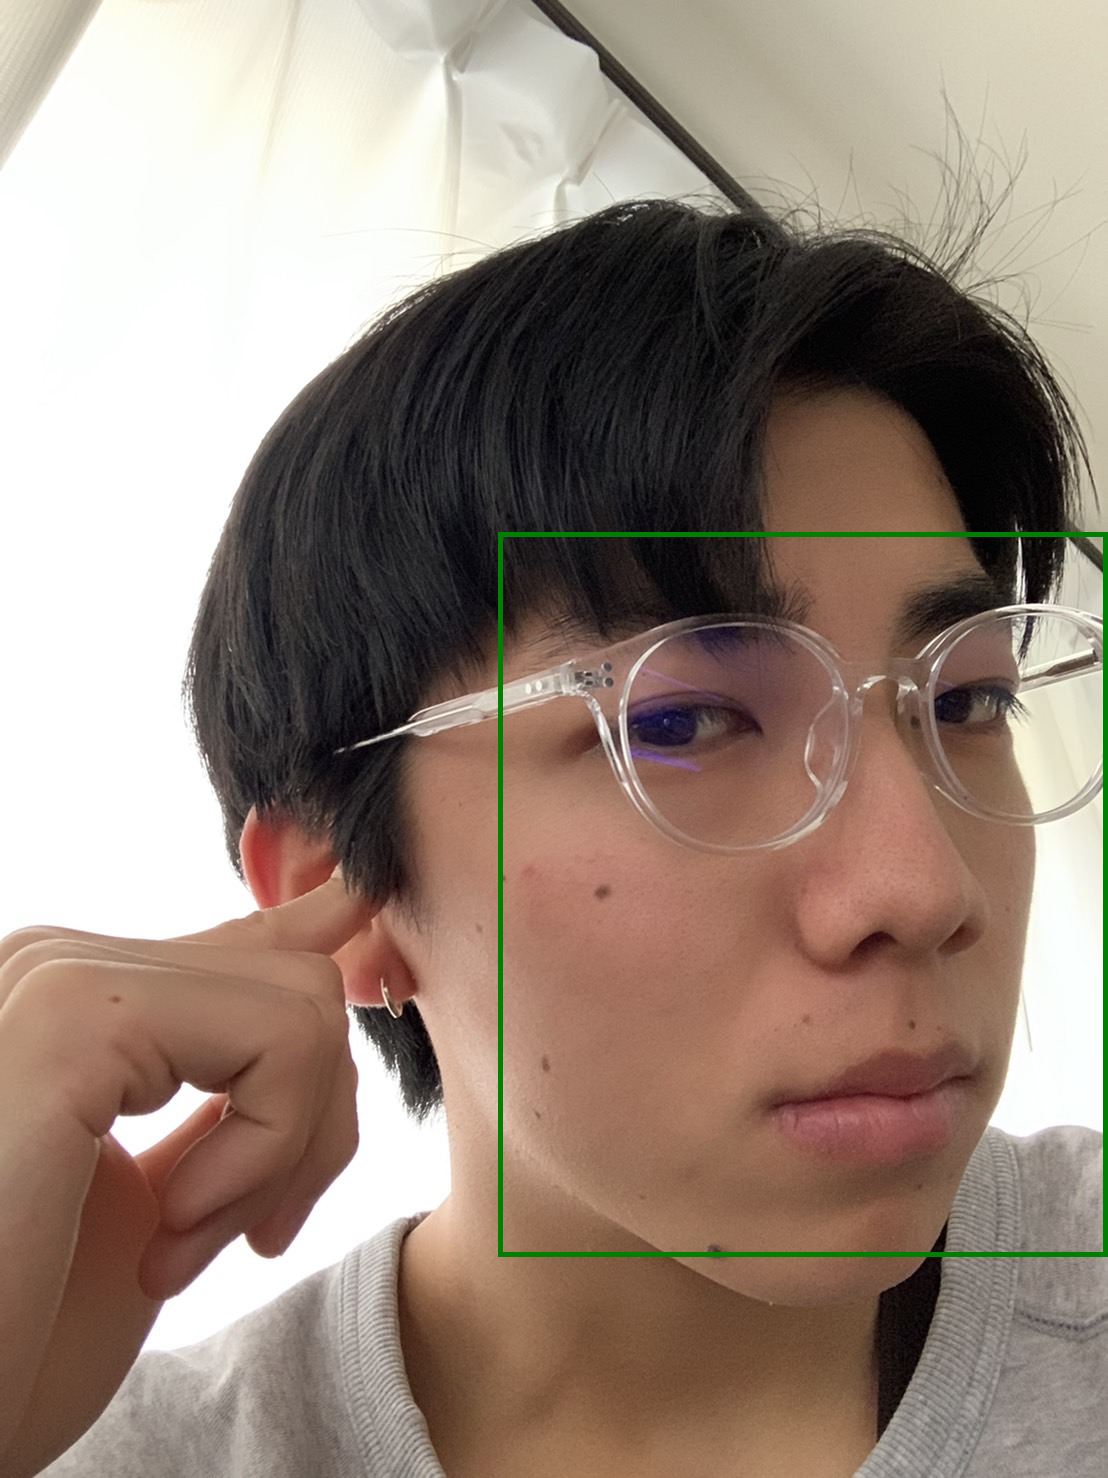

In [138]:
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=5)
img

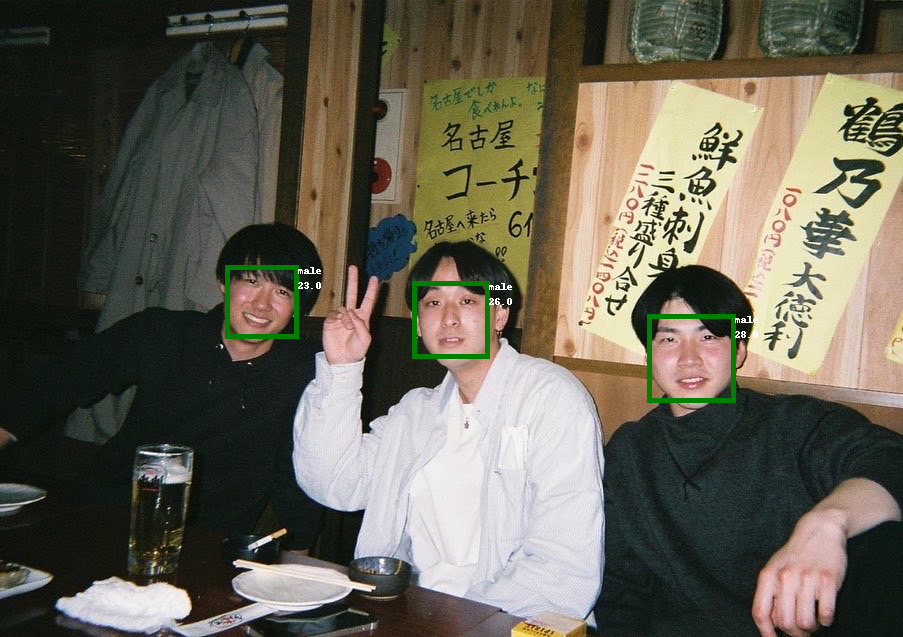

In [23]:
import requests
from PIL import Image
from PIL import ImageDraw

subscription_key = '2a27e11cacae4ca0aa27fe68c84feb1e'
assert subscription_key
face_api_url = 'https://face-recognition-app.cognitiveservices.azure.com/face/v1.0/detect'

#画像の展開→バイナリーデータによる展開
img = Image.open('複数人数.jpg')
with open('複数人数.jpg', 'rb') as f:
    binary_img = f.read()

#APIをたたくための設定
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}
           
params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise', 
}

response = requests.post(face_api_url, params=params, headers=headers, data=binary_img)



#レスポンスから結果をもってきて、レクタングルデータを抽出
results = response.json()
for result in results:
    rect = result['faceRectangle']
    attr = result['faceAttributes']


#描画画像に描画をする
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=5)
    draw.text((rect['left']+rect['width'], rect['top']), str(attr['gender']), fill = (255, 0, 0))
    draw.text((rect['left']+rect['width'], rect['top']+15), str(attr['age']))
    #　改行版テキストdraw.text((rect['left']+rect['width'], rect['top']), 'gender\nage')
img